In [576]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_rows', 500)

from cataclop.ml.pipeline.balphagore import Balphagore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [577]:
def reco_mysql():
    from django.db import connections, connection
    for conn in connections.all():
        conn.close_if_unusable_or_obsolete()

In [578]:
balphagore = Balphagore()
balphagore.load_dataset(filters={'start_at__date__gte':'2019-01-01', 'start_at__date__lte':'2019-12-31', 'sub_category': 'HANDICAP'})

1345 races


In [579]:
#balphagore.df['target'] = ((balphagore.df['position'] >= 1) & (balphagore.df['position'] <= balphagore.df['declared_player_count'] / 3)).astype('float')
#balphagore.df['target'] = np.log(1 + (balphagore.df['race_winner_dividend'] + balphagore.df['winner_dividend'])/100.)
balphagore.TARGET = 'position_log'
#balphagore.FEATURES = balphagore.FEATURES + ['final_odds_ref', 'final_odds']

In [580]:
balphagore.train()

12283 train samples, 3122 validation samples


Epoch 1/5
156/156 [==============================] - 3s 9ms/step - loss: 1.0595
Epoch 2/5
156/156 [==============================] - 1s 10ms/step - loss: 0.3909
Epoch 3/5
156/156 [==============================] - 2s 14ms/step - loss: 0.3503
Epoch 4/5
156/156 [==============================] - 2s 12ms/step - loss: 0.3261
Epoch 5/5
192/192 [==============================] - 1s 3ms/step
Epoch 1/5
155/155 [==============================] - 3s 12ms/step - loss: 1.7767
Epoch 2/5
155/155 [==============================] - 2s 15ms/step - loss: 0.4133
Epoch 3/5
155/155 [==============================] - 1s 9ms/step - loss: 0.3446
Epoch 4/5
155/155 [==============================] - 1s 6ms/step - loss: 0.3342
Epoch 5/5
192/192 [==============================] - 2s 10ms/step


In [581]:
balphagore.debug_race(balphagore.df_train)

position sub_category  num                     music  \
race_id                                                               
77284   1434        2.0     HANDICAP    4      3p5p1p(18)9p4p5p5p3p   
        1439        5.0     HANDICAP    9        (18)0p2p1p6p5p6p0p   
        1438        8.0     HANDICAP    8                (18)0p3p2p   
        1437        3.0     HANDICAP    7            8p8p7p4p(18)0p   
        1436        4.0     HANDICAP    6                    4p4p8p   
        1435        9.0     HANDICAP    5    1p8p4p(18)1p2p5p5p2p3p   
        1433        7.0     HANDICAP    3              (18)9p6p4p6p   
        1432        1.0     HANDICAP    2                9p(18)9p4p   
        1431        6.0     HANDICAP    1    6p(18)6p3p5p3p2p4p1p6p   
78333   2598        5.0     HANDICAP    1                3p3p7p0p1p   
        2599        1.0     HANDICAP    2                1p1p2p1p1p   
        2607        6.0     HANDICAP   10                2p7p3p2p3p   
        2600        3.0     HANDICAP    3                4p1p2p6p2p   
        2601        7.0     HANDICAP    4              4p0p(18)0p0p   
        2602        2.0     HANDICAP    5              1p6p(18)0p0p   
        2603        4.0     HANDICAP    6                  4p5p6p3p   
        2604       10.0     HANDICAP    7              (18)0p0p0p3p   
        2605        8.0     HANDICAP    8                6p2p2p2p0p   
        2606        9.0     HANDICAP    9              7p0p(18)0p0p   
79673   3772        2.0     HANDICAP    1              6p4p(18)9p1p   
        3778        6.0     HANDICAP    7              9p7p(18)7p7p   
        3777        5.0     HANDICAP    6              1p3p(18)3p2p   
        3776        3.0     HANDICAP    5              2p6p(18)4p8p   
        3775        7.0     HANDICAP    4              (18)7p6p0p1p   
        3774        1.0     HANDICAP    3              1p0p(18)7p9p   
        3773        4.0     HANDICAP    2                0p8p3p2p5p   
80514   4520       11.0     HANDICAP    5                  7p6p5p3p   
        4516        7.0     HANDICAP    1              2p(18)7p6p2p   
        4517        3.0     HANDICAP    2                    3p4p7p   
        4518        8.0     HANDICAP    3                5p0p7p5p5p   
        4519        2.0     HANDICAP    4                1p2p8p4p4p   
        4521       10.0     HANDICAP    6              4p6p5p(18)6p   
        4522        4.0     HANDICAP    7              (18)6p0p7p0p   
        4523        6.0     HANDICAP    8              0p(18)3p8p4p   
        4524        5.0     HANDICAP    9              7p9p9p(18)4p   
        4525        1.0     HANDICAP   10                7p0p4p6p4p   
        4526        9.0     HANDICAP   11              0p0p8p(18)0p   
83183   6840        3.0     HANDICAP    3                3p5p1p6p0p   
        6838        1.0     HANDICAP    1                1p3p3p2p2p   
        6839        6.0     HANDICAP    2                6p0p2p1p0p   
        6841        2.0     HANDICAP    4                1p3p1p1p7p   
        6843        5.0     HANDICAP    6                3p0p7p2p7p   
        6842        4.0     HANDICAP    5                1p0p2p4h1h   
83758   7304        NaN     HANDICAP    5                0p0p6p2p0p   
        7303        NaN     HANDICAP    4                0p9p0p0p0p   
        7300        NaN     HANDICAP    1                0p0p0p8p1p   
        7302        NaN     HANDICAP    3                0p0p7p0p2p   
        7311        NaN     HANDICAP   12                6p4p8p0p6p   
        7301        NaN     HANDICAP    2                3p3p3p3p1p   
        7309        NaN     HANDICAP   10              0p7p6p(18)5p   
        7308        NaN     HANDICAP    9                      7p0p   
        7307        NaN     HANDICAP    8                8p0p5p0p0p   
        7306        NaN     HANDICAP    7                1p8p9p4p2p   
        7305        NaN     HANDICAP    6                  6p8p8p9p   
        7310        NaN     HANDICAP   

In [675]:
balphagore.bet(balphagore.df_train)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1076/1076 [07:56<00:00,  2.26it/s]


In [676]:
for strat in balphagore.strategies:
    print(strat["name"])
    print(balphagore.bets[balphagore.bets['strategy']==strat["name"]].filter(regex='^top', axis=1).mean())

three_favs
top1_correct             0.178677
top1_in_3_correct        0.440276
top2_correct             0.025666
top2_correct_disorder    0.047384
top3_correct             0.003949
top3_correct_disorder    0.026654
top4_correct             0.000987
top4_correct_disorder    0.020731
top2_in_4_correct        0.253702
dtype: float64
three_underdogs
top1_correct             0.107601
top1_in_3_correct        0.298124
top2_correct             0.012833
top2_correct_disorder    0.021718
top3_correct             0.000000
top3_correct_disorder    0.004936
top4_correct             0.000000
top4_correct_disorder    0.007897
top2_in_4_correct        0.162883
dtype: float64
one_underdog_two_favs
top1_correct             0.080948
top1_in_3_correct        0.269497
top2_correct             0.016782
top2_correct_disorder    0.034551
top3_correct             0.003949
top3_correct_disorder    0.022705
top4_correct             0.000987
top4_correct_disorder    0.007897
top2_in_4_correct        0.181639
dty

In [677]:
reco_mysql()
balphagore.compute_profit()

  0%|                                                                                                                                                        | 8/17217 [00:01<41:30,  6.91it/s]/opt/pysetup/.venv/lib/python3.7/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17217/17217 [03:29<00:00, 82.36it/s]


In [678]:
print(balphagore.bets['race_id'].nunique())
b = balphagore.bets
b = b[b['pred']>0]
for strat in balphagore.strategies:
    print(strat["name"])
    print(b[b['strategy']==strat["name"]].filter(regex='^profit_', axis=1).mean())

1013
three_favs
profit_win                     -0.025962
profit_placed                  -0.152813
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.398519
profit_top3_correct            -0.034551
profit_top3_correct_disorder   -0.391807
profit_top4_correct            -0.017769
profit_top4_correct_disorder   -0.161895
profit_top2_in_4_correct       -0.229714
dtype: float64
three_underdogs
profit_win                      0.096841
profit_placed                  -0.137808
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.264857
profit_top3_correct            -0.034551
profit_top3_correct_disorder   -0.770879
profit_top4_correct            -0.017769
profit_top4_correct_disorder   -0.161895
profit_top2_in_4_correct       -0.168608
dtype: float64
one_underdog_two_favs
profit_win                     -0.211451
profit_placed                  -0.172162
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.220336
profit_top3_co

In [679]:
profit_cols = [col for col in balphagore.bets.columns if col.startswith('profit_')]

HANDICAP
three_favs
273 -0.058241758241758264
273 -0.1989010989010989
273 0.0
273 -0.319047619047619
273 -0.029304029304029304
273 -0.10842490842490837
273 -0.02564102564102564
273 -0.15384615384615385
273 -0.20183150183150184


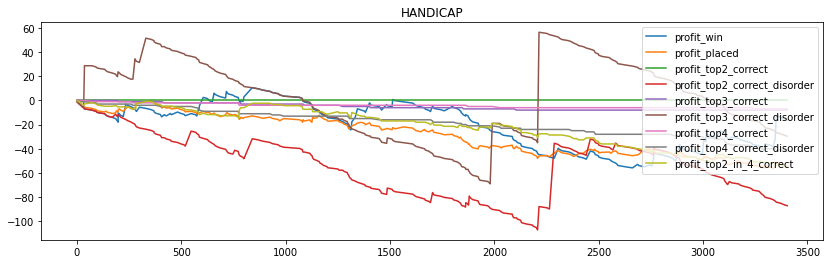

three_underdogs
262 0.3786259541984733
262 -0.038167938931297725
262 0.0
262 0.30496183206106875
262 -0.04961832061068702
262 -0.5236641221374045
262 -0.015267175572519083
262 -0.16030534351145037
262 -0.35725190839694654


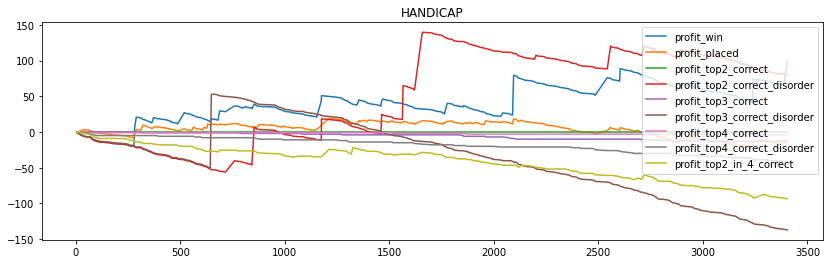

one_underdog_two_favs
386 -0.24455958549222795
386 -0.13626943005181347
386 0.0
386 -0.4823834196891191
386 -0.038860103626943004
386 -0.6453367875647669
386 -0.010362694300518135
386 -0.16580310880829016
386 -0.10621761658031086


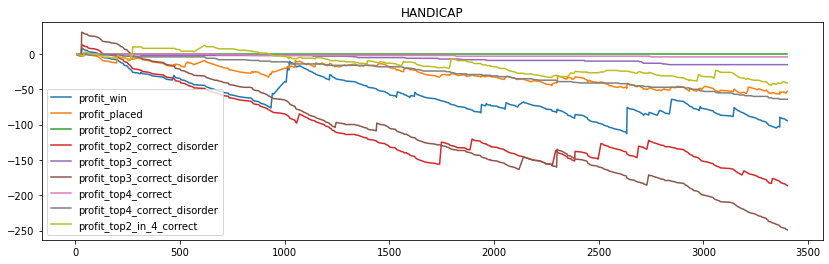

one_fav_two_underdogs
163 0.3987730061349693
163 -0.03558282208588958
163 0.0
163 -0.3276073619631902
163 -0.03067484662576687
163 -0.5680981595092024
163 -0.012269938650306749
163 -0.15950920245398773
163 -0.20122699386503065


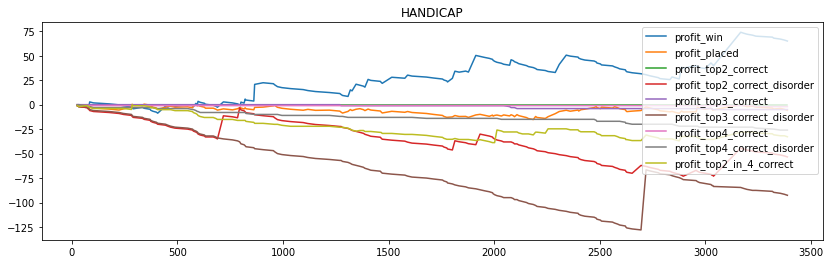

three_odds_favs
219 -0.07534246575342467
219 -0.09634703196347033
219 0.0
219 -0.07579908675799088
219 -0.045662100456621
219 -0.7269406392694063
219 -0.0273972602739726
219 0.02054794520547945
219 -0.1981735159817352


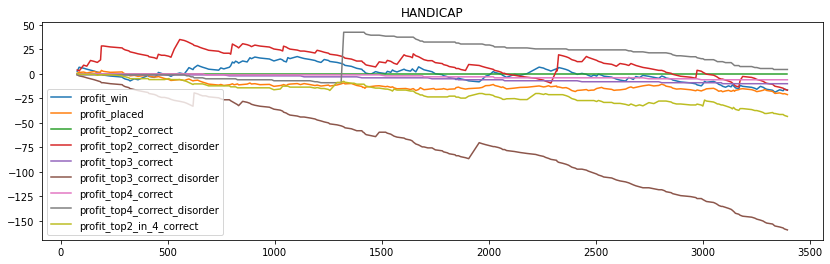

two_odds_fav_one_fav
233 -0.04763948497854076
233 -0.06652360515021459
233 0.0
233 -0.05665236051502147
233 -0.04291845493562232
233 -0.4622317596566523
233 -0.02575107296137339
233 -0.21888412017167383
233 -0.20343347639484974


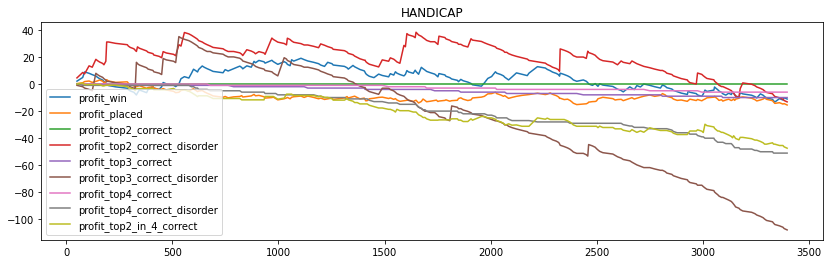

one_odds_fav_two_favs
94 0.29148936170212764
94 0.04042553191489364
94 0.0
94 0.12446808510638294
94 -0.031914893617021274
94 -0.5276595744680851
94 0.0
94 -0.13829787234042554
94 -0.029787234042553193


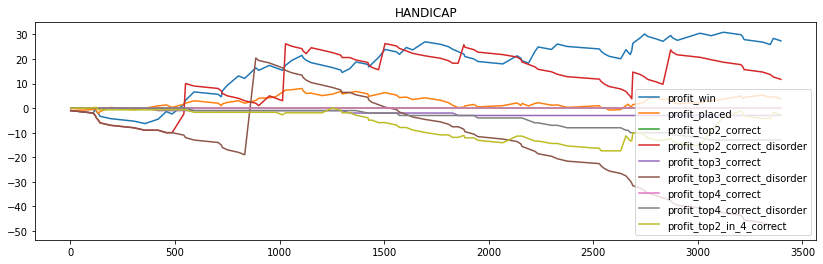

tocards1
518 -0.39034749034749033
518 -0.32548262548262547
518 0.0
518 -0.4498069498069498
518 -0.05405405405405406
518 -0.48841698841698844
518 -0.023166023166023165
518 -0.17374517374517376
518 -0.17799227799227796


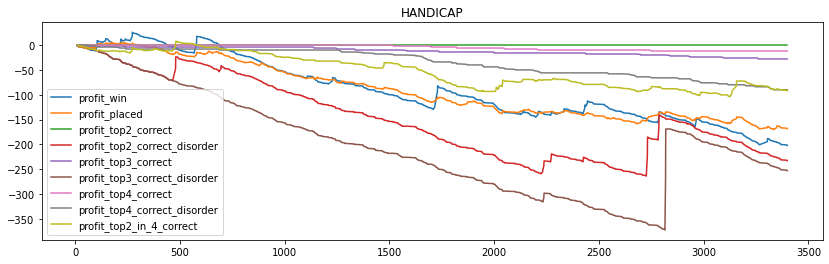

tocards1
518 -0.39034749034749033
518 -0.32548262548262547
518 0.0
518 -0.4498069498069498
518 -0.05405405405405406
518 -0.48841698841698844
518 -0.023166023166023165
518 -0.17374517374517376
518 -0.17799227799227796


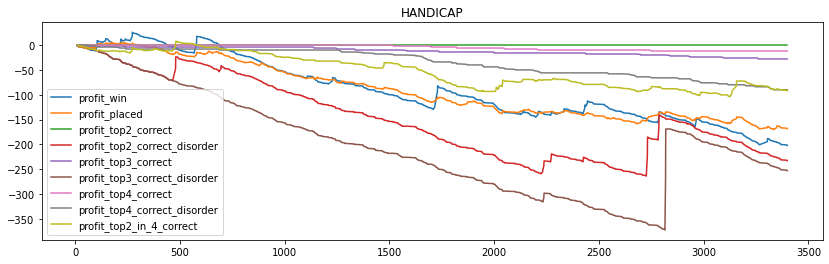

tocards2
260 -0.11115384615384612
260 -0.20846153846153845
260 0.0
260 -0.4334615384615384
260 -0.05
260 0.03730769230769232
260 -0.015384615384615385
260 0.3023076923076923
260 -0.2511538461538461


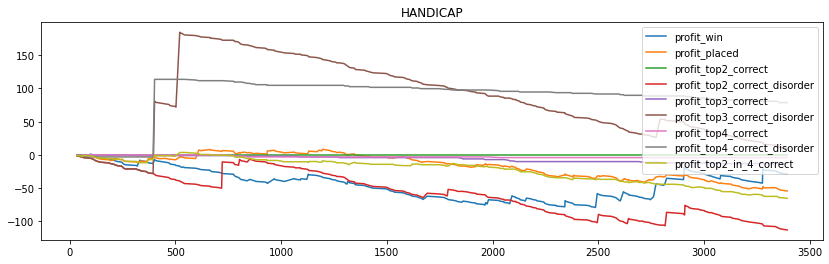

tocards3
231 -0.07186147186147186
231 -0.07705627705627707
231 0.0
231 0.777922077922078
231 -0.03896103896103896
231 -0.3255411255411256
231 -0.03896103896103896
231 -0.18181818181818182
231 0.26796536796536796


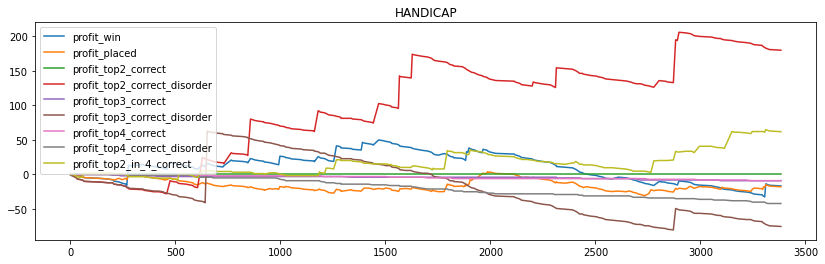

tocards4
251 0.14223107569721113
251 -0.1254980079681275
251 0.0
251 -0.5274900398406374
251 -0.035856573705179286
251 0.0820717131474104
251 -0.00796812749003984
251 -0.17131474103585656
251 -0.25019920318725103


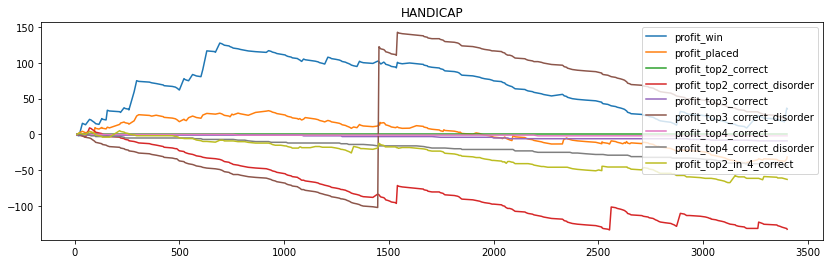

two_tocards_one_fav
119 -0.15042016806722688
119 -0.20588235294117643
119 0.0
119 0.10672268907563022
119 -0.03361344537815126
119 -0.7453781512605042
119 -0.01680672268907563
119 -0.08403361344537816
119 -0.1638655462184874


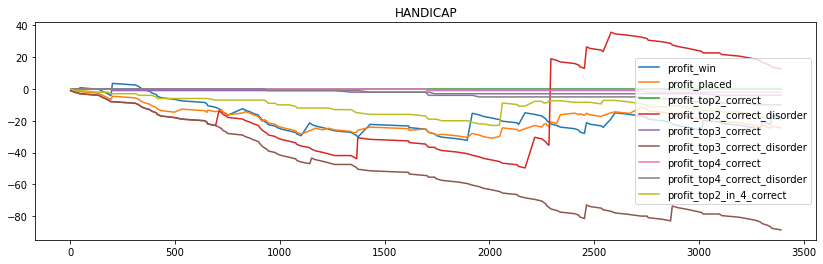

two_tocards1_one_fav
115 -0.5678260869565218
115 -0.4547826086956521
115 0.0
115 -0.5513043478260868
115 -0.034782608695652174
115 -0.4765217391304348
115 -0.02608695652173913
115 -0.1391304347826087
115 -0.13913043478260867


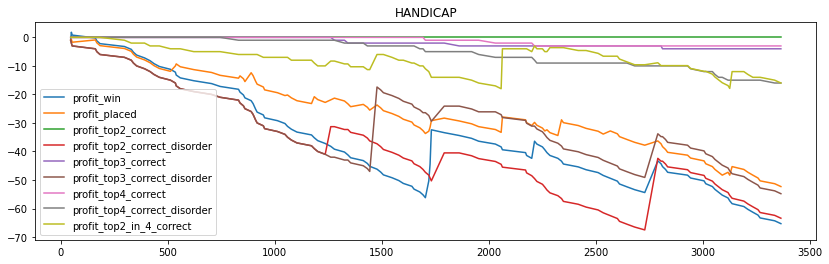

two_tocards2_one_fav
100 -0.285
100 -0.05500000000000002
100 0.0
100 0.6289999999999999
100 -0.03
100 -0.897
100 -0.01
100 -0.12
100 -0.109


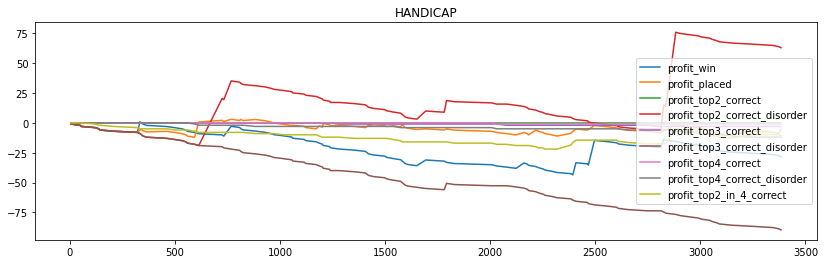

two_tocards3_one_fav
95 -0.5136842105263157
95 -0.12105263157894737
95 0.0
95 0.10000000000000003
95 -0.021052631578947368
95 1.3642105263157893
95 -0.021052631578947368
95 -0.2
95 0.32947368421052636


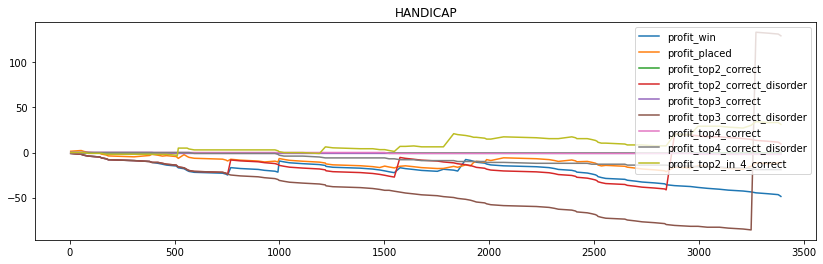

two_tocards4_one_fav
86 -0.263953488372093
86 -0.1813953488372093
86 0.0
86 -0.7348837209302326
86 0.0
86 -1.0
86 0.0
86 -0.26744186046511625
86 -0.09767441860465116


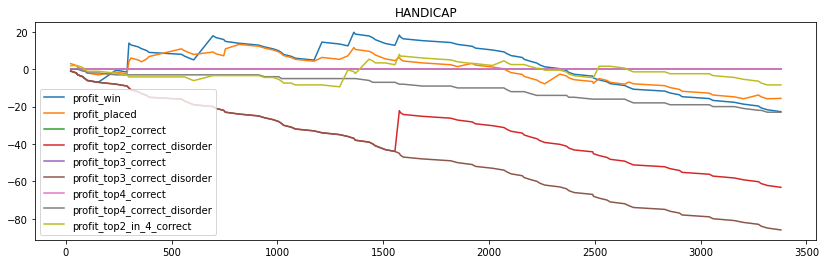

In [680]:
from matplotlib import pyplot as plt
for subcat in balphagore.bets.sub_category.value_counts().index[:5]:
    print(subcat)
    b = balphagore.bets
    b = b[(b['sub_category']==subcat) & (b['b_odds_3']>b['b_odds_2']) & (b['b_odds_2']<b['b_odds_1'])].copy()
    b.reset_index(inplace=True, drop=True)
    for strat in balphagore.strategies:
        print(strat["name"])
        for col in profit_cols:
            print(b[b['strategy']==strat["name"]][col].count(), b[b['strategy']==strat["name"]][col].mean())
            b[b['strategy']==strat["name"]][col].cumsum().plot(title=subcat, legend=True, figsize=(14,4))
        plt.show()

,profit_win,profit_placed,profit_top2_correct,profit_top2_correct_disorder,profit_top3_correct,profit_top3_correct_disorder,profit_top4_correct,profit_top4_correct_disorder,profit_top2_in_4_correct
count,231.000000,231.000000,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,-0.071861,-0.077056,0.0,0.777922,-0.038961,-0.325541,-0.038961,-0.181818,0.267965
std,3.547324,1.745290,0.0,8.179810,0.193922,7.199323,0.193922,0.386532,3.270649
min,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,0.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000
50%,-1.000000,-1.000000,0.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
75%,-1.000000,0.550000,0.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,29.000000,10.800000,0.0,62.000000,0.000000,103.800000,0.000000,0.000000,26.600000


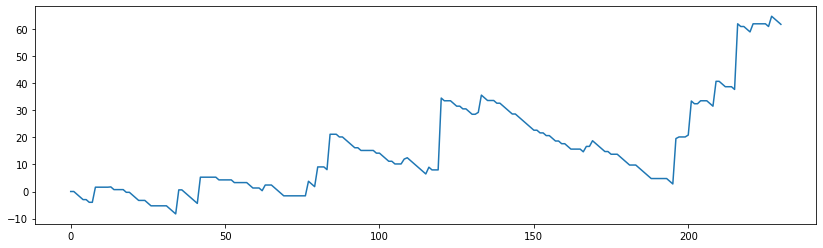

In [674]:
subcat = 'HANDICAP'
col = 'profit_top2_in_4_correct'
strat = 'tocards3'

b = balphagore.bets
b = b[(b['sub_category']==subcat) & (b['strategy']==strat) & (b['b_odds_3']>b['b_odds_2']) & (b['b_odds_2']<b['b_odds_1']) ].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot(figsize=(14,4))
b[profit_cols].describe()

In [611]:
cols = ['profit_win']
b[b['profit_win']>0][['race_id', 'category', 'start_at', 'b_odds_mean3', 'b_odds_1', 'b_odds_2', 'b_odds_3', 'odds_1', 'odds_2', 'odds_3', 'combo', 'combo_real', 'odds'] + cols]

,race_id,category,start_at,b_odds_mean3,b_odds_1,b_odds_2,b_odds_3,odds_1,odds_2,odds_3,combo,combo_real,odds,profit_win
10,77911,PLAT,2019-04-17 16:15:00,14.466667,24.8,2.1,16.5,6.5,6.5,16.5,"[7, 3, 10, 1]","[7, 6]","[24.8, 2.1, 16.5, 6.5]",7.5
13,78424,PLAT,2019-05-01 13:45:00,17.666667,44.0,4.3,4.7,4.7,6.3,7.2,"[9, 8, 7, 3]","[9, 1, 8]","[44.0, 4.3, 4.7, 14.0]",3.8
14,78430,PLAT,2019-05-01 16:50:00,18.133333,38.0,8.2,8.2,7.2,7.7,8.2,"[3, 9, 7, 2]","[3, 10, 6]","[38.0, 8.2, 8.2, 13.0]",4.1
16,78605,PLAT,2019-05-06 19:30:00,11.866667,22.0,8.6,5.0,4.1,5.0,8.6,"[1, 4, 9, 3]","[1, 12]","[22.0, 8.6, 5.0, 11.0]",17.0
17,78959,PLAT,2019-05-15 14:45:00,12.700000,21.0,10.0,7.1,6.4,6.4,7.1,"[10, 3, 5, 12]","[10, 12, 8]","[21.0, 10.0, 7.1, NaN]",5.3
31,84017,PLAT,2019-09-25 16:20:00,18.050000,31.0,NaN,5.1,4.2,5.1,23.0,"[10, 5, 9, 7]","[10, 9, 11]","[31.0, NaN, 5.1, NaN]",9.5
39,86801,STEEPLECHASE,2019-12-11 14:47:00,15.450000,25.0,NaN,5.9,4.4,5.9,7.6,"[10, 6, 4, 1]","[10, 11, 3]","[25.0, NaN, 5.9, 16.0]",34.4


In [ ]:
balphagore.save_model()

In [622]:
reco_mysql()
balphagore2 = Balphagore()
balphagore2.load_dataset(filters={'start_at__date__gte':'2021-09-01', 'start_at__date__lte':'2021-10-01', 'sub_category': 'HANDICAP'})

168 races


In [ ]:
balphagore2.load_model()


In [623]:
balphagore2.models = balphagore.models

In [624]:
balphagore.TARGET = 'position_log'
balphagore2.predict(balphagore2.df)

/opt/pysetup/.venv/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


61/61 [==============================] - 0s 2ms/step


In [625]:
balphagore2.debug_race()

position sub_category  num                   music  \
race_id id                                                            
111089  1348795       3.0     HANDICAP    1              4p1p2p6p5p   
        1348797       2.0     HANDICAP    3                2p1p6p1p   
        1348798       9.0     HANDICAP    4                7p3p0p4p   
        1348799       6.0     HANDICAP    5            7p1p(20)4p1p   
        1348800       4.0     HANDICAP    6            8p5p5p(20)8p   
        1348801       7.0     HANDICAP    7              1p4p2p3p2p   
        1348802       8.0     HANDICAP    8              5p5p7pTp5p   
        1348803       NaN     HANDICAP    9              4p5p2p7p2p   
        1348804       5.0     HANDICAP   10              1p7p0p7p2p   
        1348796       1.0     HANDICAP    2              1p4p7p1p2p   
111117  1349122       9.0     HANDICAP    1            8p8p(20)0p8p   
        1349124       4.0     HANDICAP    3              3p5p6p2p0p   
        1349123       2.0     HANDICAP    2              0p3p3p1p2p   
        1349127       NaN     HANDICAP    6              2p2p6p4p0p   
        1349128       NaN     HANDICAP    7              8p2p2p1p8p   
        1349129      11.0     HANDICAP    8            7p8p(19)3p3p   
        1349130       6.0     HANDICAP    9              2p5p5p3p2p   
        1349131       3.0     HANDICAP   10                1p9p6p6p   
        1349132       5.0     HANDICAP   11              3p1p9p8p4p   
        1349133       1.0     HANDICAP   12              4p5p9p2p0p   
        1349134       7.0     HANDICAP   13              5p4p9p4p1p   
        1349135       NaN     HANDICAP   14              1p5p8p3p1p   
        1349126       8.0     HANDICAP    5                0p6p0p3p   
        1349125      10.0     HANDICAP    4              5p6p4p1p0p   
111549  1354020       8.0     HANDICAP    1        4p1p0p1p3p2p5p9p   
        1354021       7.0     HANDICAP    2      6p8p6p3p3p1p(20)5p   
        1354029       5.0     HANDICAP   10            9p0p0p8p4p6p   
        1354026       NaN     HANDICAP    7  4p4p3p6p3p6p(20)0p3p8p   
        1354025       1.0     HANDICAP    6    6p1p4p8p9p6p6p0p1p7p   
        1354024       3.0     HANDICAP    5  1p1p3p3p5p5p7p(20)0p7p   
        1354023       2.0     HANDICAP    4    3p1p2p2p2p(20)3p2p5p   
        1354022       4.0     HANDICAP    3          5pTp2p3p5p4p1p   
        1354028       6.0     HANDICAP    9              4p3p0p4p7p   
        1354027       9.0     HANDICAP    8              (20)8p6p7p   
111691  1355628      10.0     HANDICAP    2                    0p0p   
        1355627       6.0     HANDICAP    1              0p3p6p2p2p   
        1355636       4.0     HANDICAP   10              3p9p0p9p0p   
        1355635       3.0     HANDICAP    9                9p0p0p0p   
        1355634       1.0     HANDICAP    8              2p9p9p0p3p   
        1355633       8.0     HANDICAP    7              0p0p0p0p0p   
        1355632       7.0     HANDICAP    6              6p2p5p8p4p   
        1355630       5.0     HANDICAP    4              1p2p2p2p9p   
        1355631       2.0     HANDICAP    5                0p1p0p0p   
        1355629       9.0     HANDICAP    3              0p0p0p0p0p   
111729  1356090       4.0     HANDICAP    8              4p2p2p6p4p   
        1356089       5.0     HANDICAP    7              5p1p6p2p2p   
        1356088       3.0     HANDICAP    6                3p1p2p5p   
        1356086       2.0     HANDICAP    4                9p2p3p1p   
        1356085       1.0     HANDICAP    3              7p1p2p5p4p   
        1356084       8.0     HANDICAP    2              0p9p3p4p1p   
        1356083       7.0     HANDICAP    1              4p3p1p3p2p   
        1356087       6.0     HANDICAP    5              2p3p(20)6p   
111812  1356978       2.0     HANDICAP    1            4p(20)1p2p4p   
        1356979       3.0     HANDICAP    2              1p2p2p1p5p   
        1356980       5.0     HANDICAP   

In [626]:
balphagore2.bet(balphagore2.df)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:51<00:00,  3.25it/s]


In [627]:
balphagore2.compute_profit()

  1%|▉                                                                                                                                                       | 11/1804 [00:00<01:01, 28.94it/s]/opt/pysetup/.venv/lib/python3.7/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1804/1804 [00:26<00:00, 68.92it/s]


In [266]:
b = balphagore2.bets

In [628]:
b.filter(regex='^top', axis=1).describe()

,top1_correct,top1_in_3_correct,top2_correct,top2_correct_disorder,top3_correct,top3_correct_disorder,top4_correct,top4_correct_disorder,top2_in_4_correct
count,231.000000,231.000000,231.000000,231.000000,231.0,231.000000,231.0,231.000000,231.000000
mean,0.095238,0.294372,0.034632,0.056277,0.0,0.008658,0.0,0.004329,0.147186
std,0.294181,0.456750,0.183243,0.230956,0.0,0.092846,0.0,0.065795,0.355061
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


In [647]:
print(balphagore2.bets['race_id'].nunique())
b = balphagore2.bets
b = b[b['pred']>0]
for strat in balphagore2.strategies:
    print(strat["name"])
    print(b[b['strategy']==strat["name"]].filter(regex='^profit_', axis=1).mean())

164
three_favs
profit_win                     -0.369512
profit_placed                  -0.151829
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.481098
profit_top3_correct            -0.018293
profit_top3_correct_disorder   -0.527439
profit_top4_correct            -0.012195
profit_top4_correct_disorder   -0.079268
profit_top2_in_4_correct       -0.019512
dtype: float64
three_underdogs
profit_win                      0.058537
profit_placed                   0.125610
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.756098
profit_top3_correct            -0.018293
profit_top3_correct_disorder   -0.945122
profit_top4_correct            -0.012195
profit_top4_correct_disorder   -0.079268
profit_top2_in_4_correct       -0.268293
dtype: float64
one_underdog_two_favs
profit_win                     -0.242073
profit_placed                  -0.237195
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.115244
profit_top3_cor

HANDICAP
three_favs
32 -0.33125000000000004
32 -0.371875
32 0.0
32 -0.35312499999999997
32 -0.03125
32 -0.5625
32 0.0
32 -0.0625
32 -0.21875


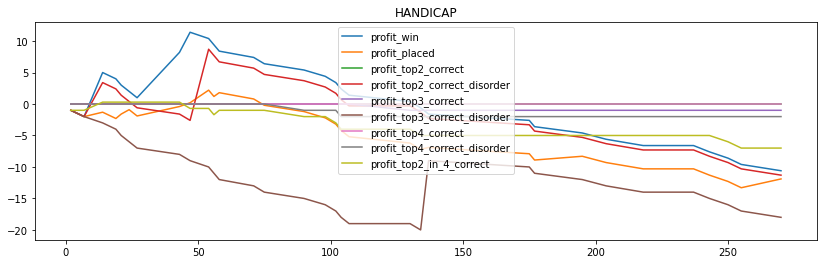

three_underdogs
24 0.00833333333333334
24 0.26666666666666666
24 0.0
24 0.4166666666666667
24 0.0
24 -0.9166666666666666
24 -0.041666666666666664
24 -0.16666666666666666
24 -0.375


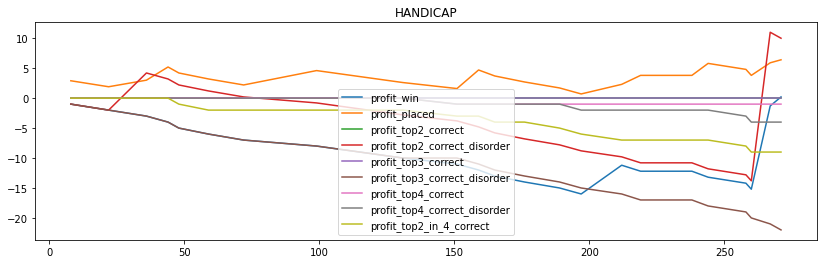

one_underdog_two_favs
50 0.05199999999999999
50 -0.264
50 0.0
50 1.064
50 -0.04
50 -0.92
50 -0.04
50 -0.16
50 -0.366


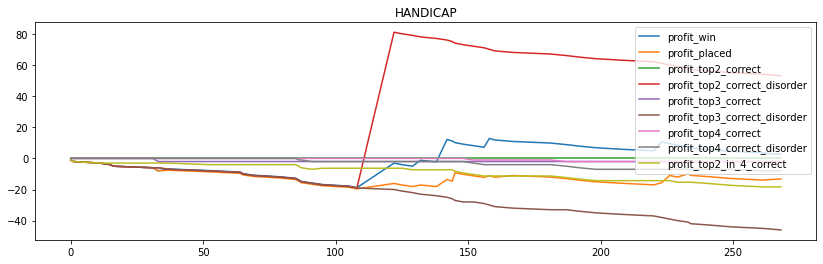

one_fav_two_underdogs
15 0.07333333333333325
15 0.07333333333333329
15 0.0
15 0.72
15 0.0
15 -0.9333333333333333
15 0.0
15 -0.06666666666666667
15 -0.39333333333333337


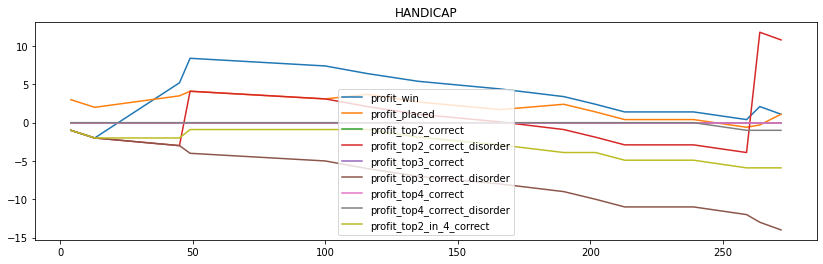

three_odds_favs
26 -0.25
26 -0.20384615384615387
26 0.0
26 -0.8269230769230769
26 0.0
26 1.1500000000000001
26 0.0
26 -0.11538461538461539
26 0.11923076923076922


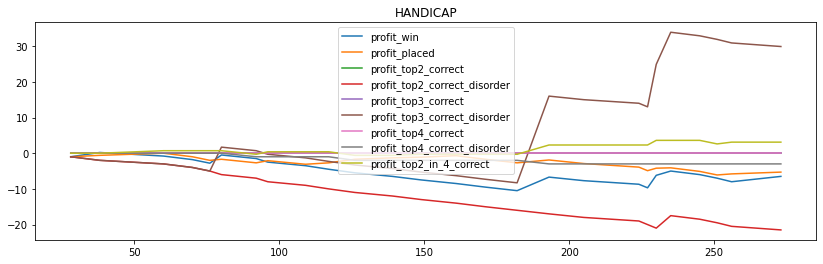

two_odds_fav_one_fav
26 -0.3307692307692308
26 -0.15769230769230771
26 0.0
26 -0.8269230769230769
26 0.0
26 -0.16923076923076918
26 -0.038461538461538464
26 -0.11538461538461539
26 -0.01923076923076924


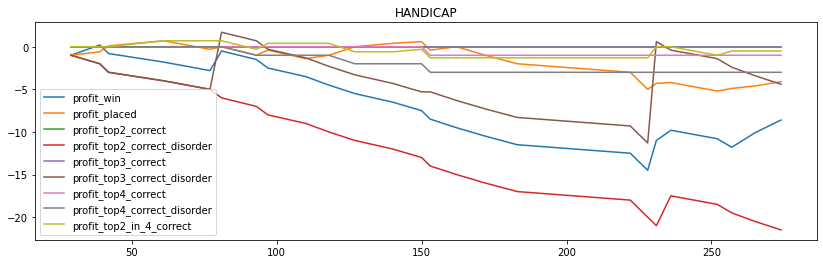

one_odds_fav_two_favs
22 -0.3681818181818182
22 -0.23636363636363633
22 0.0
22 -0.36818181818181817
22 0.0
22 1.1909090909090911
22 -0.045454545454545456
22 -0.18181818181818182
22 -0.21363636363636365


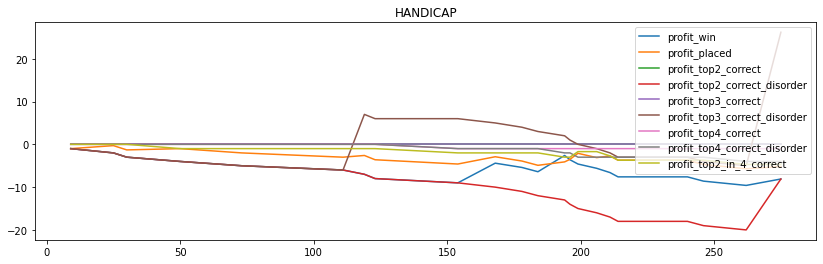

tocards3
35 -0.4799999999999999
35 -0.12857142857142861
35 0.0
35 -0.7371428571428572
35 0.0
35 -0.9428571428571428
35 0.0
35 -0.05714285714285714
35 0.5857142857142857


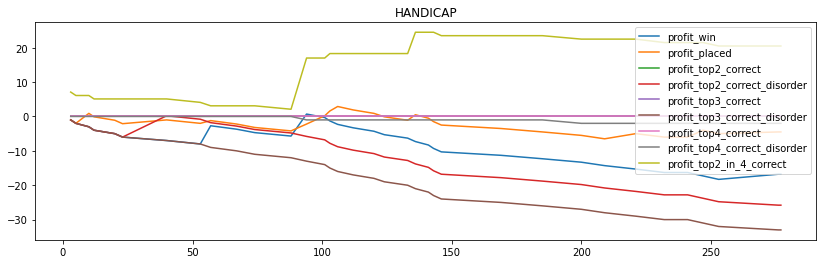

tocards4
26 0.06153846153846153
26 0.35
26 0.0
26 0.030769230769230795
26 -0.038461538461538464
26 -0.8846153846153846
26 -0.07692307692307693
26 -0.19230769230769232
26 -0.38461538461538464


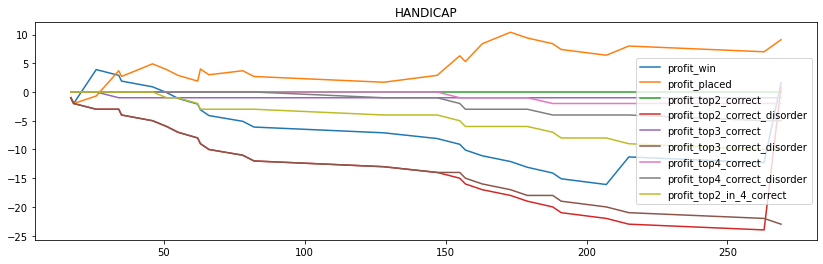

two_tocards3_one_fav
14 -1.0
14 -0.7857142857142857
14 0.0
14 -1.0
14 0.0
14 -1.0
14 0.0
14 -0.07142857142857142
14 -0.35714285714285715


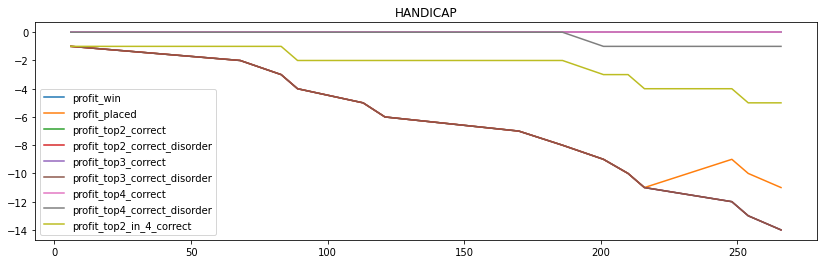

two_tocards4_one_fav
8 -0.275
8 0.21249999999999997
8 0.0
8 -1.0
8 0.0
8 -1.0
8 0.0
8 0.0
8 -0.125


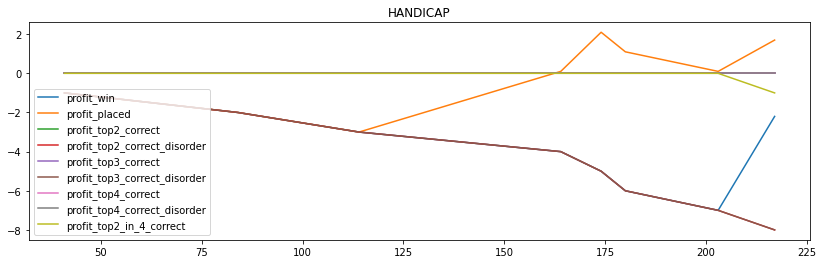

In [632]:
from matplotlib import pyplot as plt
for subcat in balphagore2.bets.sub_category.value_counts().index[:5]:
    print(subcat)
    b = balphagore2.bets
    b = b[(b['sub_category']==subcat) & (b['b_odds_3']>b['b_odds_2']) & (b['b_odds_2']<b['b_odds_1'])].copy()
    b.reset_index(inplace=True, drop=True)
    for strat in balphagore2.strategies:
        print(strat["name"])
        for col in profit_cols:
            print(b[b['strategy']==strat["name"]][col].count(), b[b['strategy']==strat["name"]][col].mean())
            b[b['strategy']==strat["name"]][col].cumsum().plot(title=subcat, legend=True, figsize=(14,4))
        plt.show()

,profit_win,profit_placed,profit_top2_correct,profit_top2_correct_disorder,profit_top3_correct,profit_top3_correct_disorder,profit_top4_correct,profit_top4_correct_disorder,profit_top2_in_4_correct
count,35.00000,35.000000,35.0,35.000000,35.0,35.000000,35.0,35.000000,35.000000
mean,-0.48000,-0.128571,0.0,-0.737143,0.0,-0.942857,0.0,-0.057143,0.585714
std,1.65597,1.262018,0.0,1.229798,0.0,0.235504,0.0,0.235504,3.017317
min,-1.00000,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,-1.000000
25%,-1.00000,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,0.000000,-0.500000
50%,-1.00000,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,0.000000,0.000000
75%,-1.00000,0.950000,0.0,-1.000000,0.0,-1.000000,0.0,0.000000,0.000000
max,6.40000,2.900000,0.0,6.200000,0.0,0.000000,0.0,0.000000,14.900000


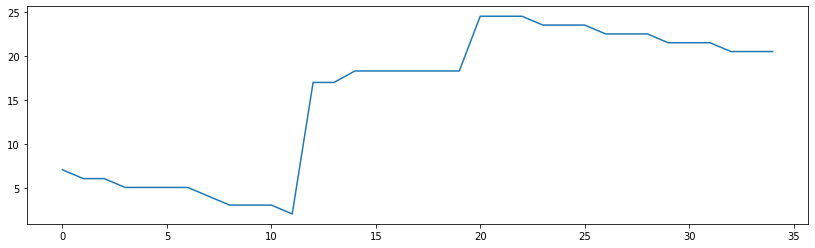

In [653]:
subcat = 'HANDICAP'
col = 'profit_top2_in_4_correct'
strat = 'tocards3'

b = balphagore2.bets
b = b[(b['sub_category']==subcat) & (b['strategy']==strat) & (b['b_odds_3']>b['b_odds_2']) & (b['b_odds_2']<b['b_odds_1']) ].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot(figsize=(14,4))
b[profit_cols].describe()